In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-dark')
%config InlineBackend.figure_format = 'retina'
pd.options.display.max_rows = 20
pd.options.display.max_columns = 20

plt.rcParams["figure.figsize"] = (14,4)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.color'] = 'r'
plt.rcParams['axes.grid'] = True

In [2]:
fish_data = np.array([2,3,3,4,4,4,4,5,5,6])
fish_data

array([2, 3, 3, 4, 4, 4, 4, 5, 5, 6])

In [3]:
np.sum(fish_data)
len(fish_data)

10

In [4]:
# 평균
# 확률변수의 개수 N
# 데이터의 총 값 (sum)
# 평균 (mu) = 데이터의 총값(sum) / 확률변수의 개수

N = len(fish_data)
sum_value = np.sum(fish_data)
mu = sum_value / N
mu

4.0

In [5]:
# 표본분산
# 데이터의 각각의 값, 여기선 numeric형 데이터 전체
# 에서 평균을 뺴고
# 뺀 값을 제곱하고
# 그것을 확률변수 총 개수로 나눔
# 그게 표본 분산

N = len(fish_data)
sum_value = np.sum(fish_data)
mu = sum_value / N
sigma_2_sample = np.sum( ((fish_data - mu) **2) / N )
print(sigma_2_sample)

np.var(fish_data,ddof=1) #불편분산 (보정 - 값이 커짐.) 

1.2


1.3333333333333333

In [6]:
np.std(fish_data) # 표본 통계량 standarad deviation

1.0954451150103321

In [7]:
np.var(fish_data,ddof=0) #ddof = 0 : 표본 분산
np.std(fish_data,ddof=0)

1.0954451150103321

In [8]:
np.var(fish_data,ddof=1) #ddof = 1 : 불편 편차
np.std(fish_data,ddof=1)

1.1547005383792515

In [9]:
np.std(fish_data,ddof=1).round(2)
std2 = np.std(fish_data,ddof=1)
np.round(std2,2)

1.15

In [10]:
# a의 평균 분산 표준편차 편차의 평균을 구하세요 *분산/표준편차는 n-1, 불편분산 적용
a = np.arange(15)

#mu
N = len(a)
sum_value = np.sum(a)
mu = sum_value / N
print('mu >' ,mu)

#sigma
sigma = np.sum(((a - mu) ** 2) / N)
var = np.var(a,ddof=1)
print('sigma >',sigma)
print('var>' , var)
#표준편차
std = np.std(a,ddof=1)
print('std >',std )

#편차의 평균 -- 편차는 평균과 데이터의 거리를 의미하니까, 평균의 왼쪽의 합(-값,) , 평균의 오른쪽의 합(+값)
# 따라서 편차의 평균은 곧 0에 수렴하게 된다. 
avg = np.mean(a-mu)
print('avg >',avg)
print(a-mu)


mu > 7.0
sigma > 18.666666666666664
var> 20.0
std > 4.47213595499958
avg > 0.0
[-7. -6. -5. -4. -3. -2. -1.  0.  1.  2.  3.  4.  5.  6.  7.]


In [11]:
from scipy import stats
stats.scoreatpercentile(fish_data,75)

4.75

In [12]:
fish_data2 = np.array([2,3,3,4,4,4,4,5,5,6,100])

In [13]:
print(fish_data2)
print(fish_data2.mean())
print(np.median(fish_data2))

[  2   3   3   4   4   4   4   5   5   6 100]
12.727272727272727
4.0


In [14]:
import pandas as pd
fish_multi = pd.read_csv('../Data/5_2_fm.csv')

In [15]:
#그룹별 통계량 계산
grouped = fish_multi.groupby('species')
display(grouped.mean())
display(grouped.std())
grouped.describe()


#제발 짧게 쓰자
display(fish_multi.groupby('species').agg(['mean','var','std']))


,length
species,
A,3
B,8


,length
species,
A,1.0
B,2.0


length         
          mean var  std
species                
A            3   1  1.0
B            8   4  2.0

In [16]:
cov_data = pd.read_csv('../Data/4_cov.csv')
cov_data

,x,y
0,18.5,34
1,18.7,39
2,19.1,41
3,19.7,38
4,21.5,45
5,21.7,41
6,21.8,52
7,22.0,44
8,23.4,44
9,23.8,49


In [17]:
#공분산 x, y / 길이 / 평균
# sum((x - x평균) * (y - y평균)) / n-1   
tL = len(cov_data)

x = cov_data['x']
y = cov_data['y']

xN = len(x)
yN = len(y)

x_sum = np.sum(x)
y_sum = np.sum(y)


x_mu = x_sum / xN
y_mu = y_sum / yN

cor_v = (( x - x_mu) * ( y - y_mu)) / (tL -1)

print(cor_v,'\n')

cor_v_simple = ( (cov_data['x'] - (cov_data['x'].mean())) * (cov_data['y'] -
                                                            (cov_data['y'].mean()) ) ) / (len(cov_data)-1)
print('simple>',cor_v_simple)

0    2.436000
1    0.953778
2    0.362667
3    0.689333
4    0.122667
5   -0.128444
6    0.806000
7    0.141556
8    0.343778
9    1.946000
dtype: float64 

simple> 0    2.436000
1    0.953778
2    0.362667
3    0.689333
4    0.122667
5   -0.128444
6    0.806000
7    0.141556
8    0.343778
9    1.946000
dtype: float64


In [18]:
# 공분산 행렬
np.cov(cov_data.x,cov_data.y,ddof=1)

# 공분산행렬의 상관행렬
np.corrcoef(cov_data.x,cov_data.y)

array([[1.       , 0.7592719],
       [0.7592719, 1.       ]])

In [19]:
## 0729 

In [20]:
#상관 계수 Correlation
cov_data.corr()

,x,y
x,1.000000,0.759272
y,0.759272,1.000000


In [21]:
# 평균 4 표준편차 0.8 정규분포에서 10개 샘플링
population = stats.norm(loc = 4, scale =0.8) #np.random.normal; rvs
population.rvs(size=10)

array([4.74012417, 4.43778412, 2.960907  , 4.94629537, 4.4258784 ,
       5.09957457, 3.10419643, 3.87537471, 4.13971591, 4.77425049])

In [22]:
sample_mean_array = np.zeros(10000) # 0이 10000개인 배열 생성. Bin
sample_mean_array[:10]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [23]:
#배열에 샘플사이즈 10인 표본 10000개의 표본 평균을 저장
for i in range(10000):
    sample_mean_array[i] = population.rvs(size=10).mean()
sample_mean_array[:10]


array([4.34734528, 3.7376815 , 3.91033789, 4.27576131, 4.23730459,
       4.19167264, 3.59868588, 3.86977063, 3.65383565, 4.05817083])

In [24]:
#표본 평균의 평균
print(sample_mean_array.mean().round(2))
#표분평균의 표준편차
print(sample_mean_array.std(ddof=1).round(2))
# np.std(sample_mean_array, ddof=1).round(2)

4.0
0.25


<AxesSubplot:ylabel='Count'>

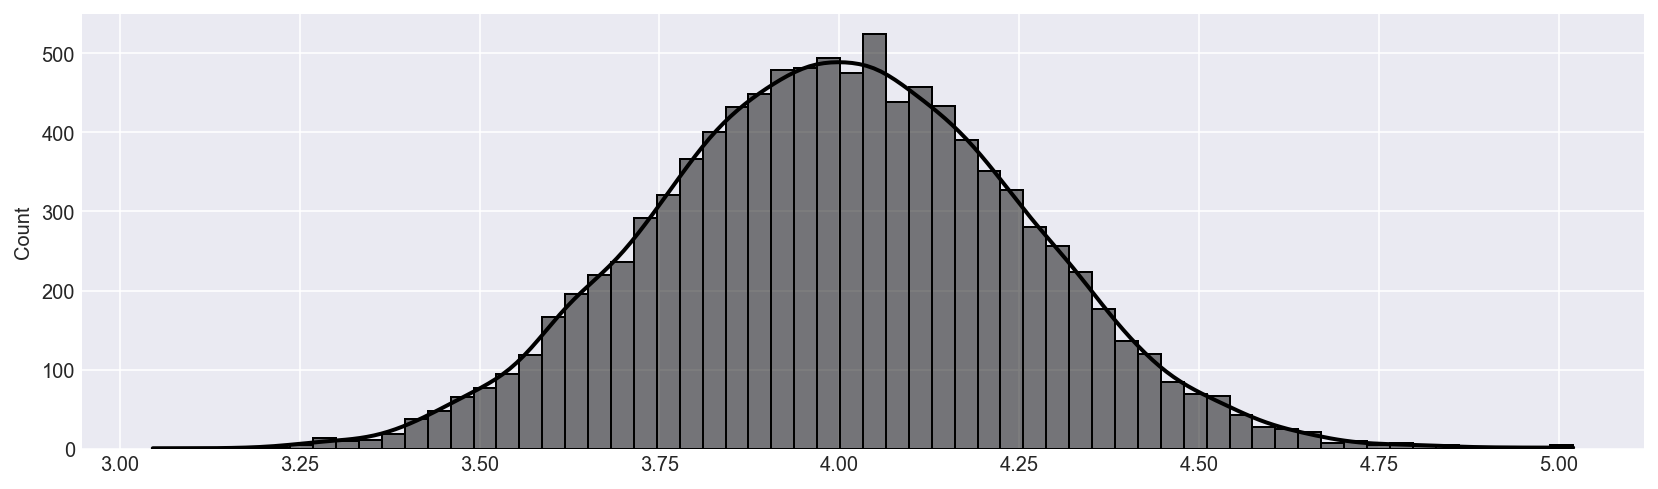

In [25]:
#seaborn활용 
sns.histplot(sample_mean_array,color='k',kde=True)

In [26]:
#sample size change
size_array = np.arange(10,100100, 100) #10,000단위로 출력
len(size_array)

1001

In [27]:
# sample size
sample_mean_array_size = np.zeros(len(size_array))
np.random.seed(1)
for i in range(0,len(size_array)):
    sample = population.rvs(size=size_array[i])
    sample_mean_array_size[i] = np.mean(sample)
sample_mean_array_size[:10]


array([3.92228729, 4.0383612 , 4.09185254, 4.01346562, 4.0047295 ,
       4.05765729, 3.98466861, 3.99126955, 3.98909837, 4.03638272])

Text(0, 0.5, 'sampel mean')

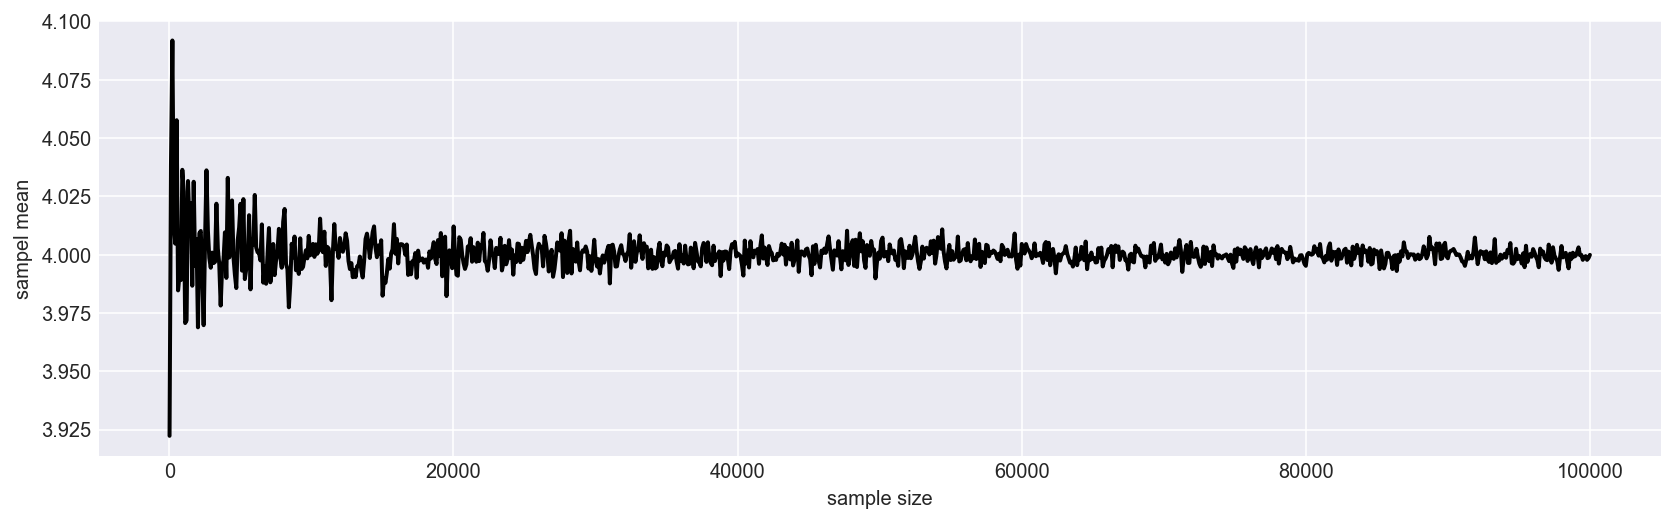

In [28]:
plt.plot(size_array,sample_mean_array_size,color='k')
plt.xlabel('sample size')
plt.ylabel('sampel mean')

Text(0, 0.5, 'sample mean')

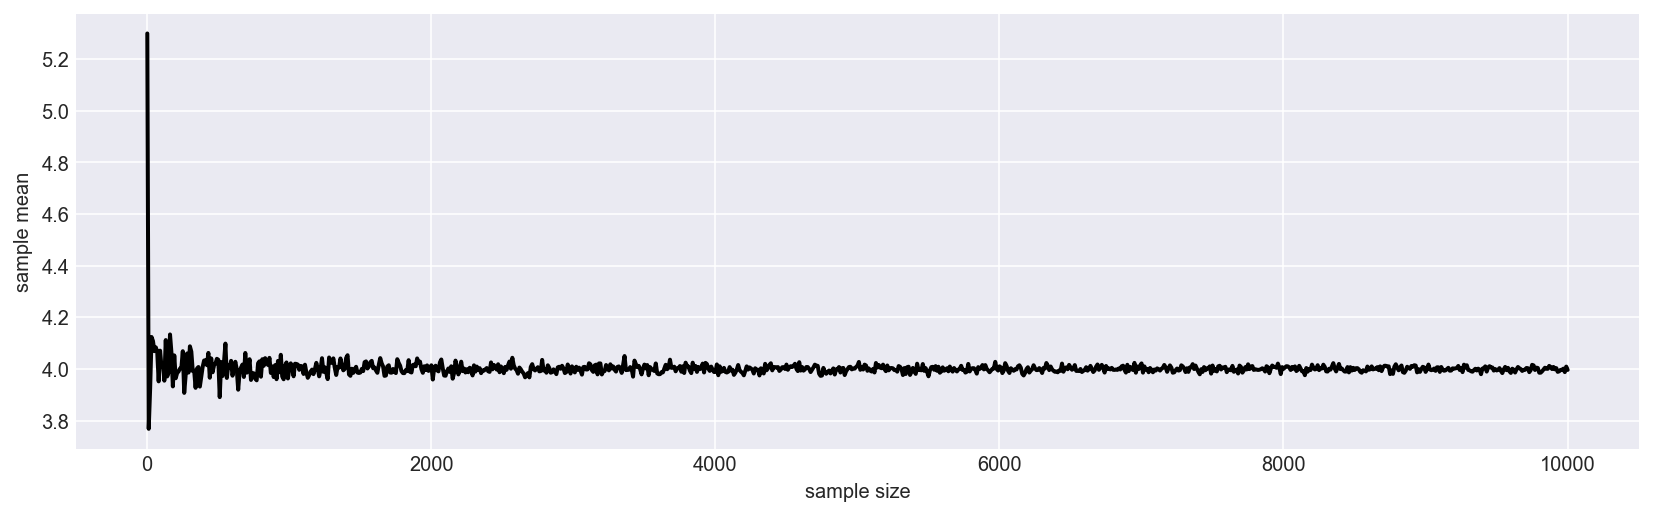

In [29]:
size_array1 =np.arange(1,10010,10)
len(size_array1)
np.random.seed(1)
for i in range(0,len(size_array1)):
    sample = population.rvs(size=size_array1[i])
    sample_mean_array_size[i] = np.mean(sample)
sample_mean_array_size[:10]
import matplotlib.pyplot as plt
plt.plot(size_array1,sample_mean_array_size,color = 'black')
plt.xlabel('sample size')
plt.ylabel('sample mean')

In [30]:
# 사용자 함수 만들기 (표본 평균)
def cal_sample_mean(size,n_trial):
    sample_mean_array = np.zeros(n_trial) #표본의 수
    for i in range(n_trial):
        sample_mean_array[i] = population.rvs(size=size).mean()
    return sample_mean_array
        
np.mean(cal_sample_mean(10,10000))

4.001773701460818

In [31]:
# size_10 
size_10 = cal_sample_mean(size=10,n_trial=10000) #10000개에 대한 표본평균을 size10에 저장
size_10_df = pd.DataFrame({'sample_mean':size_10, #sample_mean에 10000개의 값을 저장
                           'size':np.tile('size_10',10000)}) #size_10이라는 문자에 10000개를 적용

# 샘플사이즈 20

size_20 = cal_sample_mean(size=20,n_trial=10000) 
size_20_df = pd.DataFrame({'sample_mean':size_20, 
                           'size':np.tile('size_20',10000)})
# 샘플사이즈 30

size_30 = cal_sample_mean(size=30,n_trial=10000) 
size_30_df = pd.DataFrame({'sample_mean':size_30, 
                            'size':np.tile('size_30',10000)})
# 종합

sim_result = pd.concat([size_10_df,size_20_df,size_30_df])
sim_result

,sample_mean,size
0,4.134242,size_10
1,4.031433,size_10
2,4.336450,size_10
3,3.951869,size_10
4,4.193149,size_10
...,...,...
9995,3.764054,size_30
9996,4.041102,size_30
9997,4.070963,size_30
9998,4.082593,size_30


In [32]:
# Q. sim_result로 바이올린 플롯을 그리고 3개 그룹에 대한 인사이트를 기술하세요.

<AxesSubplot:xlabel='size', ylabel='sample_mean'>

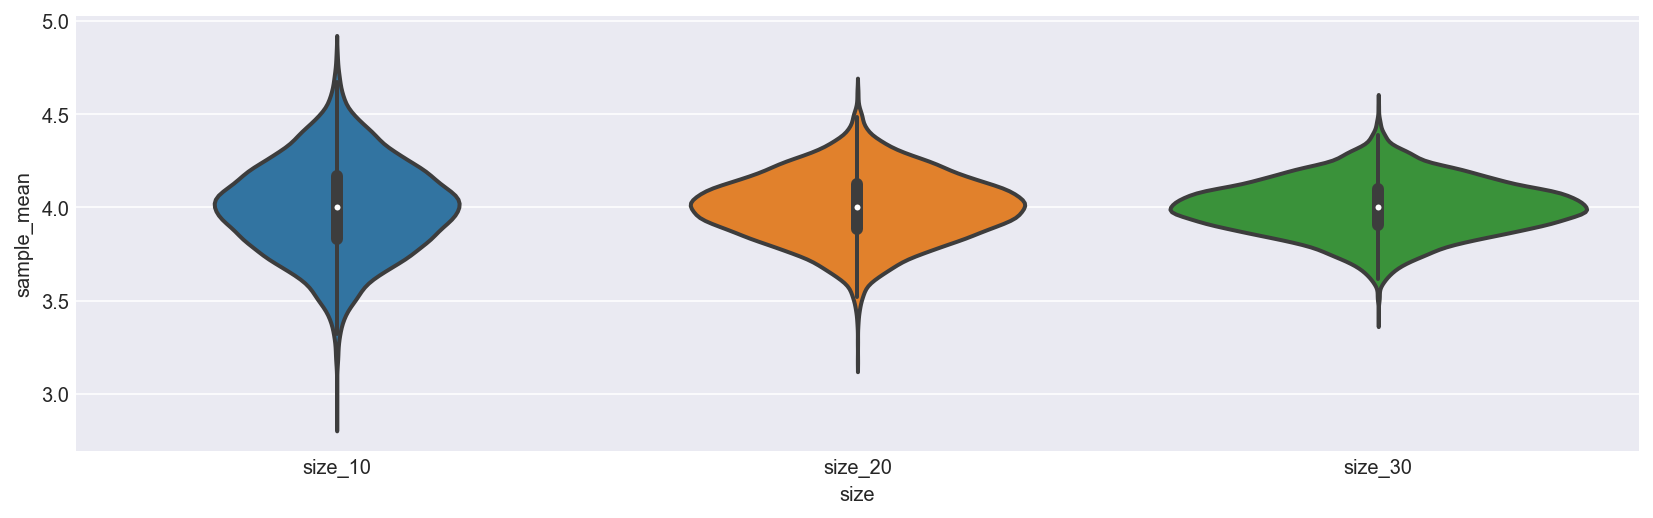

In [33]:
sns.violinplot(data=sim_result,x='size',y='sample_mean')

In [34]:
size_array = np.arange(2,102,2)
size_array

array([  2,   4,   6,   8,  10,  12,  14,  16,  18,  20,  22,  24,  26,
        28,  30,  32,  34,  36,  38,  40,  42,  44,  46,  48,  50,  52,
        54,  56,  58,  60,  62,  64,  66,  68,  70,  72,  74,  76,  78,
        80,  82,  84,  86,  88,  90,  92,  94,  96,  98, 100])

Text(0, 0.5, 'mean std value')

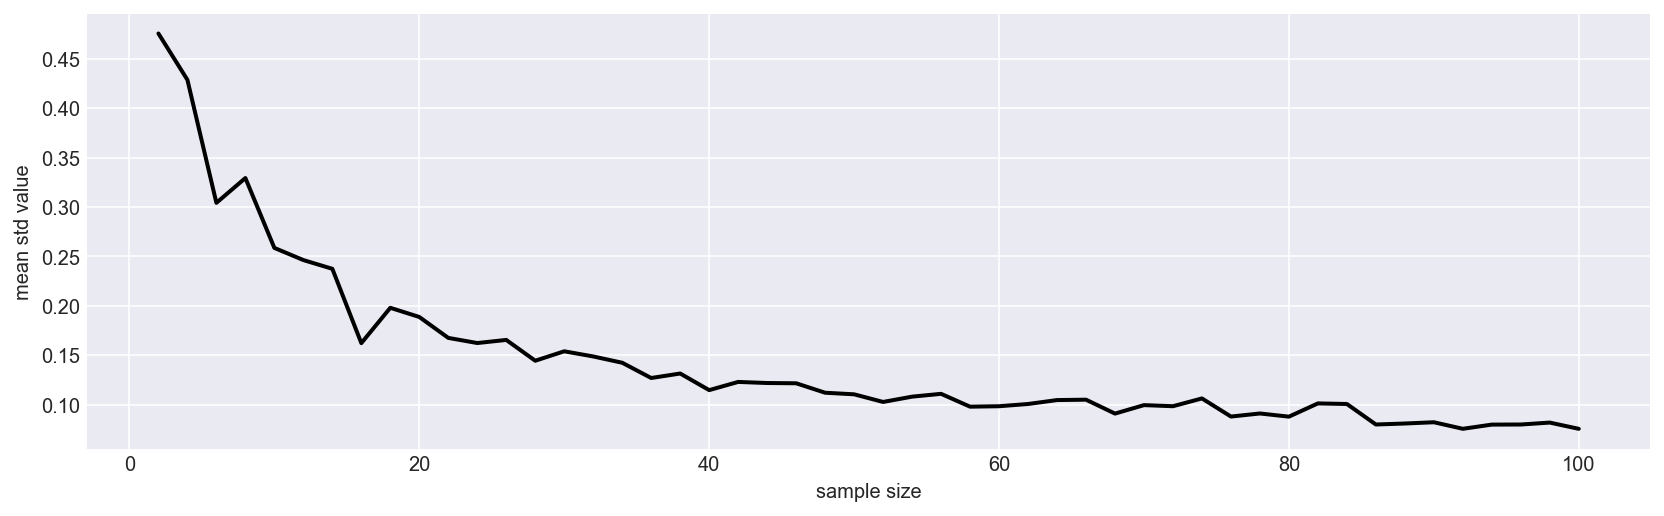

In [35]:
#표본 평균의 표준 편차를 저장할 배열
sample_mean_std_array = np.zeros(len(size_array))

# simulation
np.random.seed(1)
for i in range(0,len(size_array)):
    sample_mean = cal_sample_mean(size=size_array[i],n_trial=100)
    sample_mean_std_array[i] = np.std(sample_mean,ddof=1)
    
plt.plot(size_array,sample_mean_std_array,color='k')
plt.xlabel('sample size')
plt.ylabel('mean std value')

# 표본 평균의 표준편차
# 샘플 사이즈가 커질수록 편차가 줄어듬

In [36]:
# 표준오차: 표본평균과 모평균과의 표준적인 차이 Standard Error
# 평균의 추정치에 대한 불확실도를 수치화 하는 것.
# 샘플사이즈가 커지면 표준오차는 작아짐.
# size_arrary = 루트 N
standard_error = 0.8 / np.sqrt(size_array)
len(standard_error)

50

Text(0, 0.5, 'mean std value')

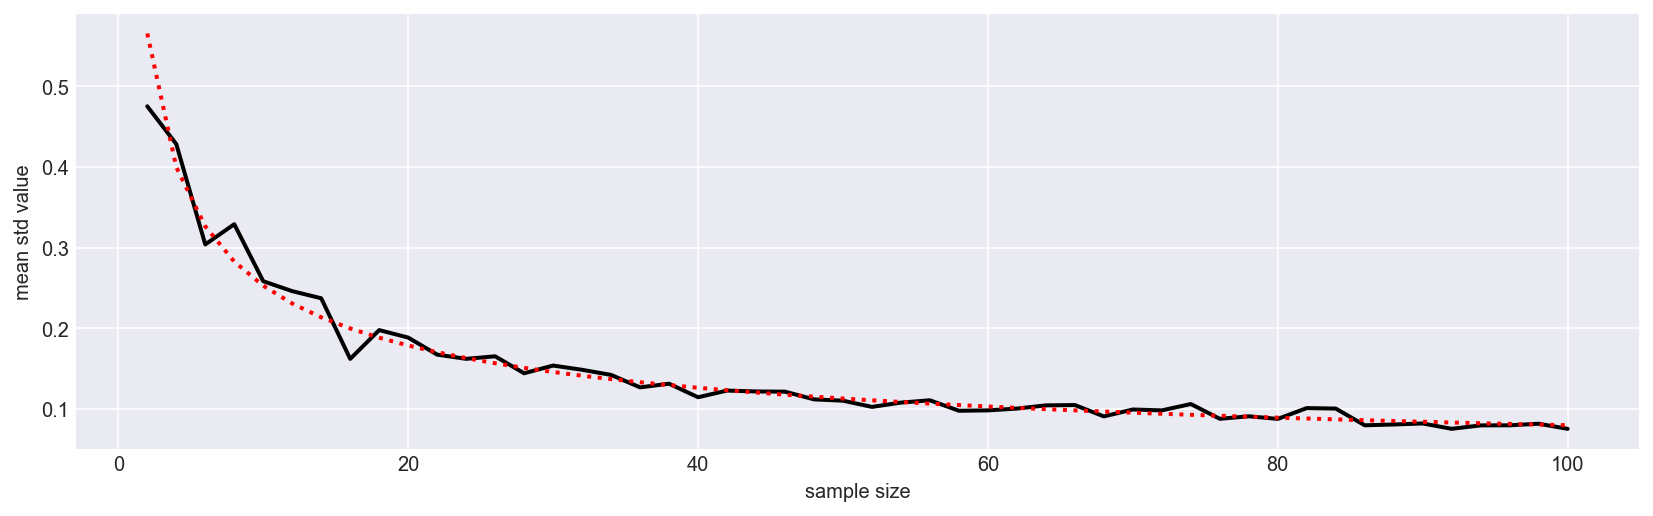

In [37]:
#시뮬레이션 결과와 표준오차간 비교
plt.plot(size_array,sample_mean_std_array, color='black')
plt.plot(size_array,standard_error,color='red',linestyle='dotted')
plt.xlabel('sample size')
plt.ylabel('mean std value')

In [38]:
#샘플사이즈가 커지면 불편분산은 모분산(0.64)에 가까워진다는 것을 그래프로 설명하세요 

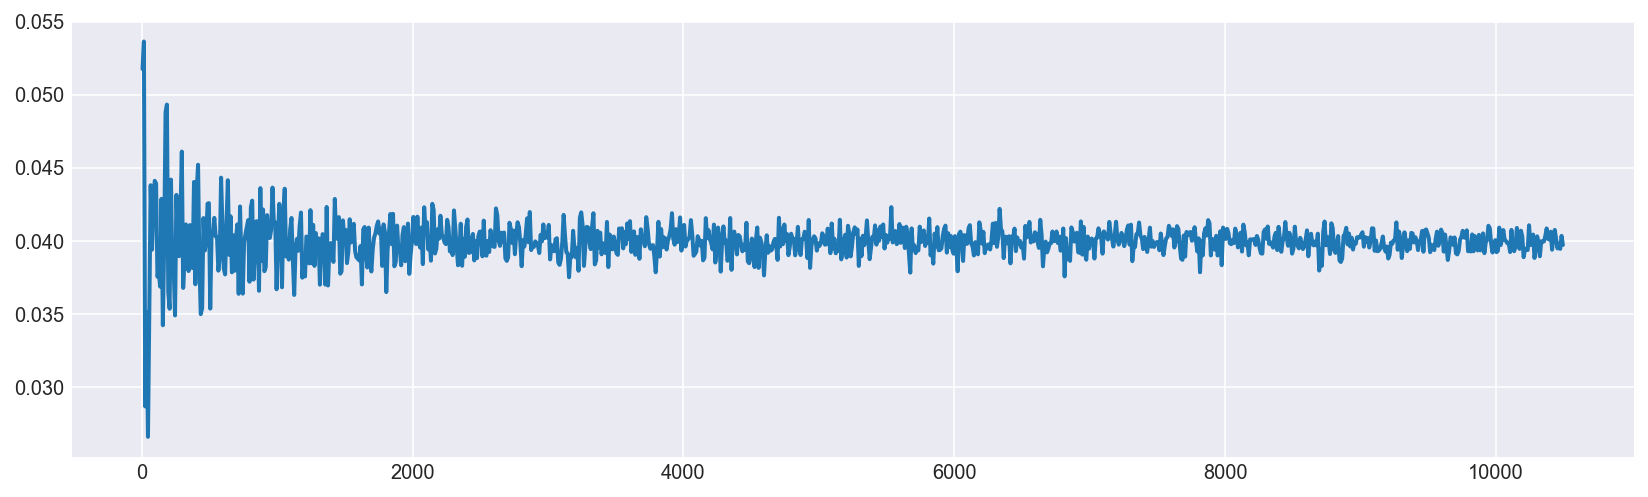

In [39]:
size_array = np.arange(5,10500,10)
len(size_array)

sample_var_array = np.zeros(len(size_array))
np.random.seed(1)
for i in range(0, len(size_array)):
    sample = stats.norm(loc=20, scale=0.2).rvs(size = size_array[i])
    var = np.var(sample,ddof=1)
    sample_var_array[i] = var

plt.plot(size_array,sample_var_array)



[    4     8    12 ...  9992  9996 10000]


Text(10100, 0.62, '0.64')

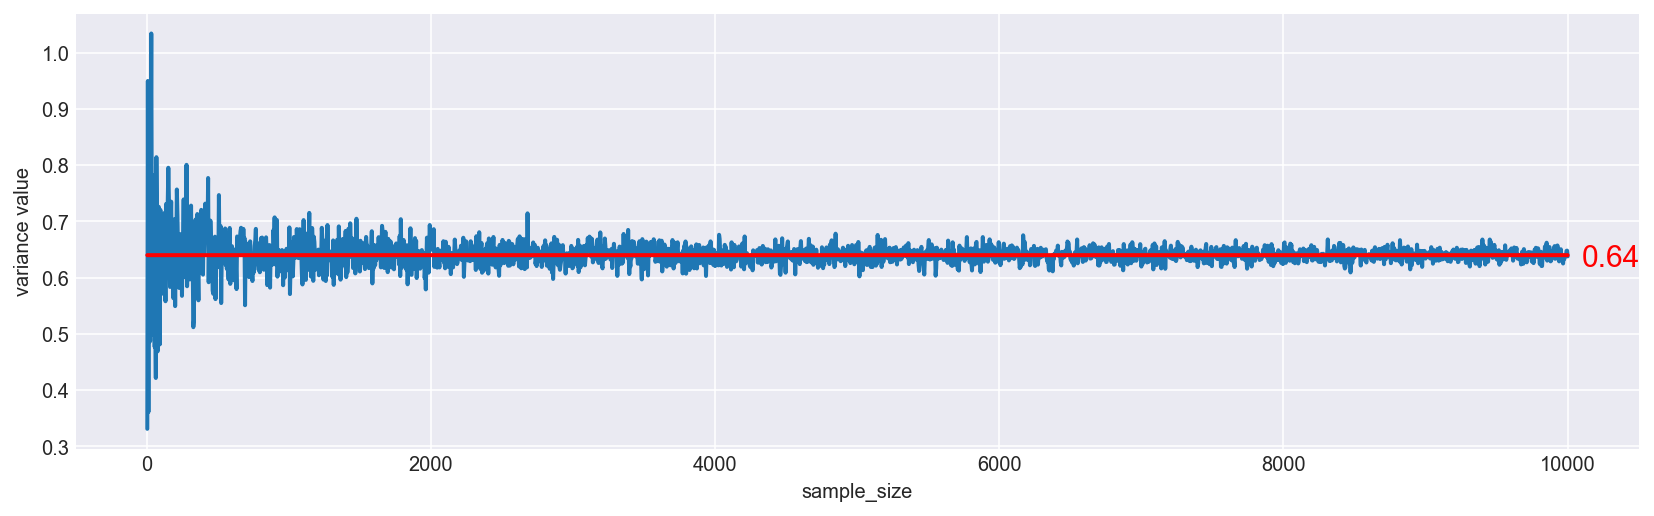

In [40]:
sample_size = np.arange(4,10004,4)
sample_size
print(sample_size)
sample_var = np.zeros(len(sample_size))

for i in range(len(sample_size)):
    sample = stats.norm(10,0.8).rvs(size=sample_size[i])
    var = np.var(sample,ddof=1)
    sample_var[i] = var

tolist = [0.64 for x in range(2500)]

plt.plot(sample_size,sample_var)
plt.plot(sample_size,tolist,color='red')
plt.xlabel('sample_size',fontsize=10)
plt.ylabel('variance value',fontsize=10)
plt.annotate(f'{0.64}',xy=(10100,0.62),color='red',fontsize=15)


In [41]:
#정규분포의 확률밀도 계산
stats.norm.pdf(loc=4, scale=0.8, x=4)

0.49867785050179086

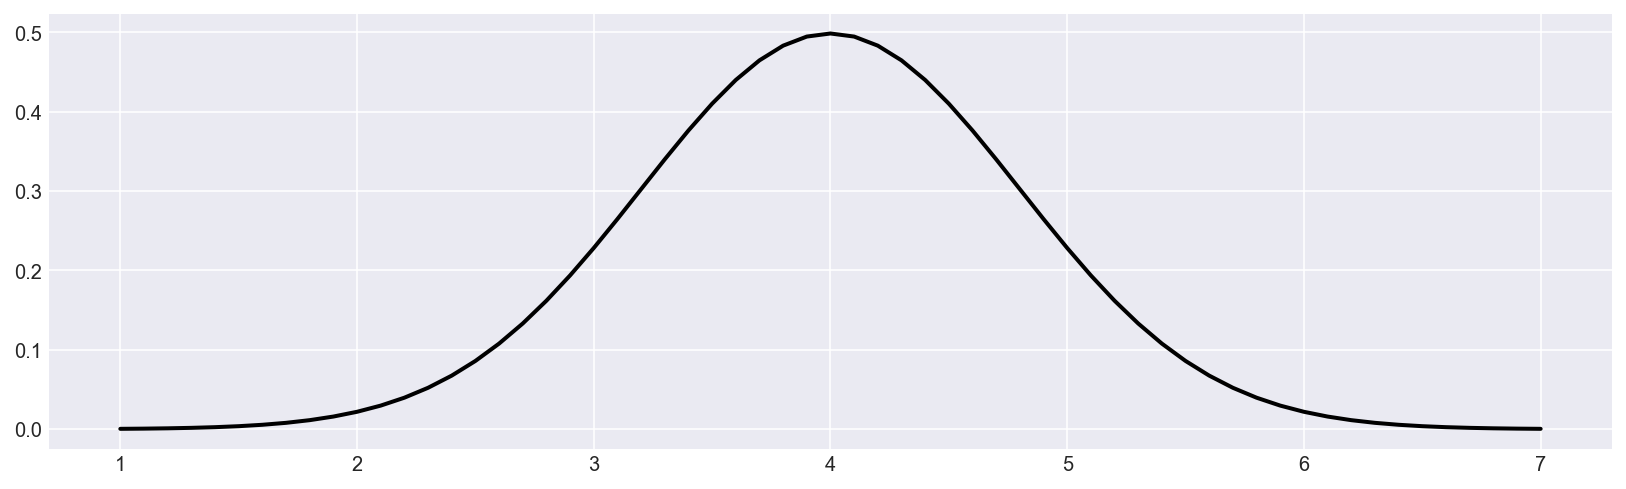

In [42]:
x_plot = np.arange(1,7.1,0.1)
plt.plot(x_plot,stats.norm.pdf(x=x_plot,loc=4,scale=0.8),color='k')

In [43]:
norm_dist = stats.norm(loc=4,scale=0.8)
print(norm_dist.pdf(x=4))
norm_dist.pdf(3)

0.49867785050179086


0.2283113567362774

In [44]:
#누적 분포 함수
stats.norm.cdf(loc=4,scale=0.8,x=7)

0.9999115827147992

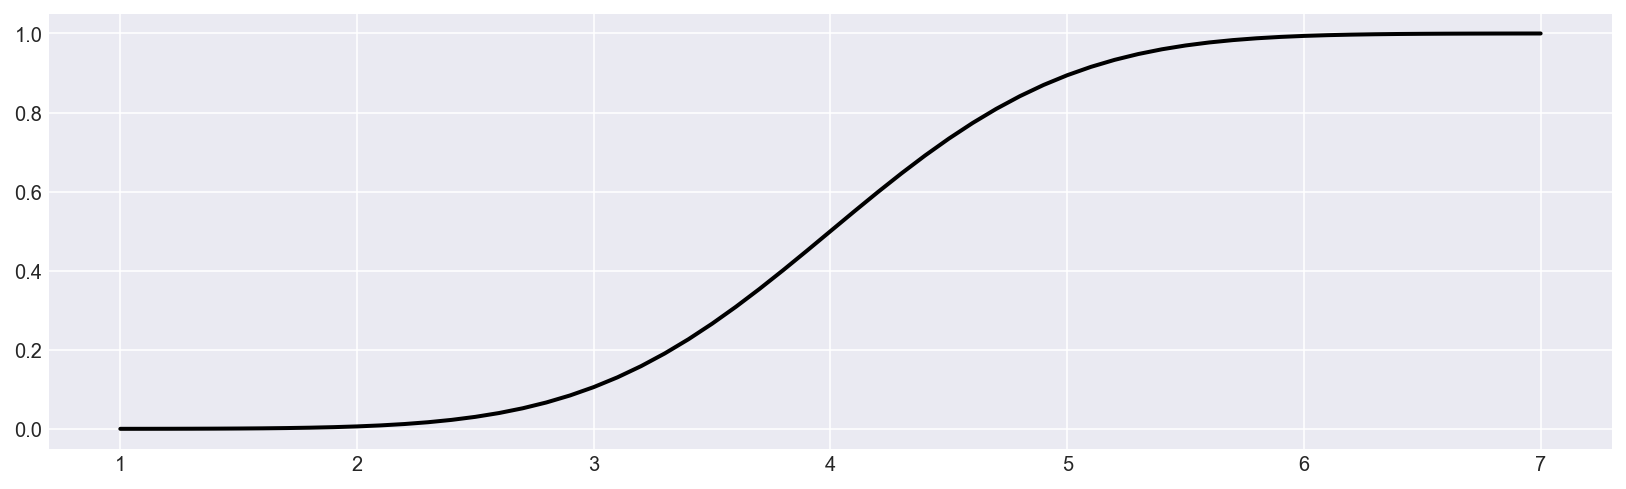

In [45]:
x_plot = np.arange(1,7.1,0.1)
plt.plot(x_plot,stats.norm.cdf(x=x_plot,loc=4,scale=0.8),color='k')

In [46]:
stats.norm.cdf(loc=4,scale=0.8,x=4)


0.5

In [47]:
#percent point , 하측확률
stats.norm.ppf(loc=4,scale=0.8,q=0.025)

2.4320288123679563

In [48]:
stats.norm.cdf(loc=4,scale=0.8,x=4)

0.5

t분포는 모집단이 정규분포를 가정하더라도 분산 $\sigma^2$이 알려져 있지 않고,표본의 수가 적은 경우에, 평균 $\mu$에 대한 신뢰구간 추정 및 가설검정에 아주 유용하게 쓰이는 분포 

[t분포의 특성]
1. t분포는 표준정규분포처럼 0을 중심으로 종형의 모습을 가진 대칭 분포이다
2. t분포의 꼬리는 표준정규분포보다 두껍다(fat tail)
3. t분포는 자유도 n에 따라 모습이 변하는데, 자유도 n이 커짐에 따라 표준정규분포 N(0,1)에 수렴한다.  
통상, 모집단의 분산이 알려져 있지 않은 경우, 표본분포를 결정할 때 표본의 크기가 30이하이면 t분포를, 그 크기가 30이상이면 표준정규분포를 이용 


In [49]:
from scipy import stats
np.random.seed(1)
t_value_array = np.zeros(10000)
norm_dist = stats.norm(loc=4,scale=0.8)
for i in range(0,10000):
    sample = norm_dist.rvs(size=10)
    sample_mean = np.mean(sample)
    sample_std = np.std(sample,ddof=1)
    sample_se = sample_std/np.sqrt(len(sample))   # standard error
    t_value_array[i] = (sample_mean - 4) / sample_se

C:\Users\kikir\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


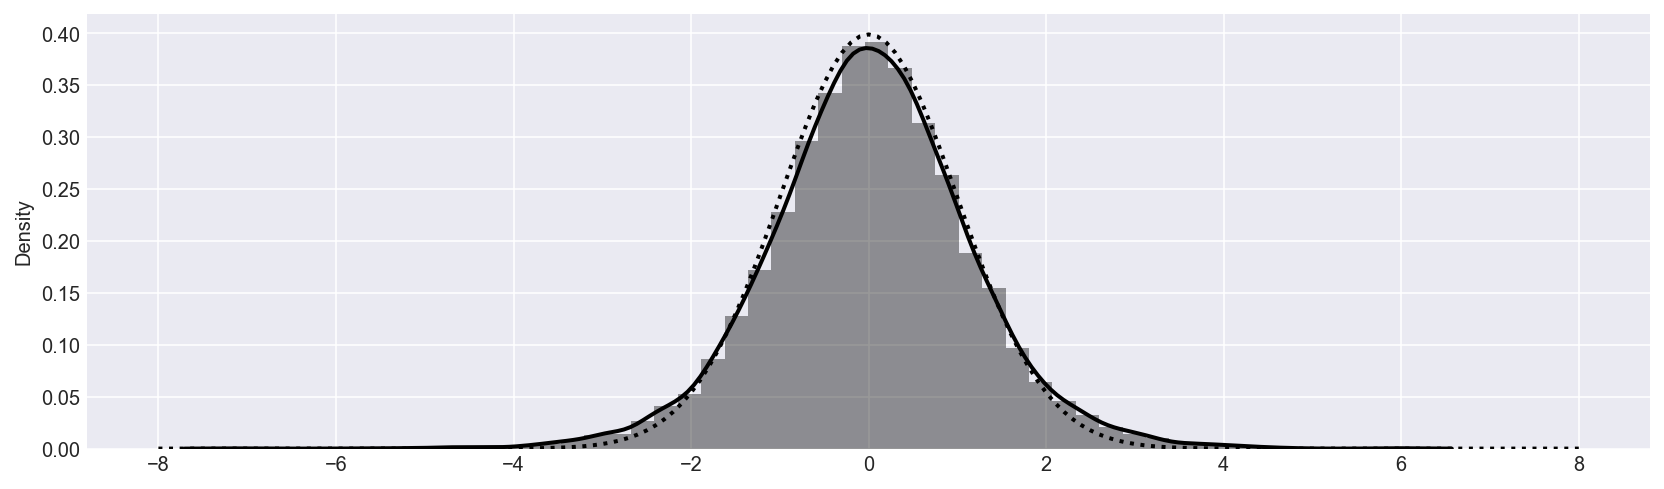

In [50]:
# t분포
sns.distplot(t_value_array,color='k')

x = np.arange(-8,8.1,0.1)
plt.plot(x,stats.norm.pdf(x=x), color='k',linestyle='dotted')

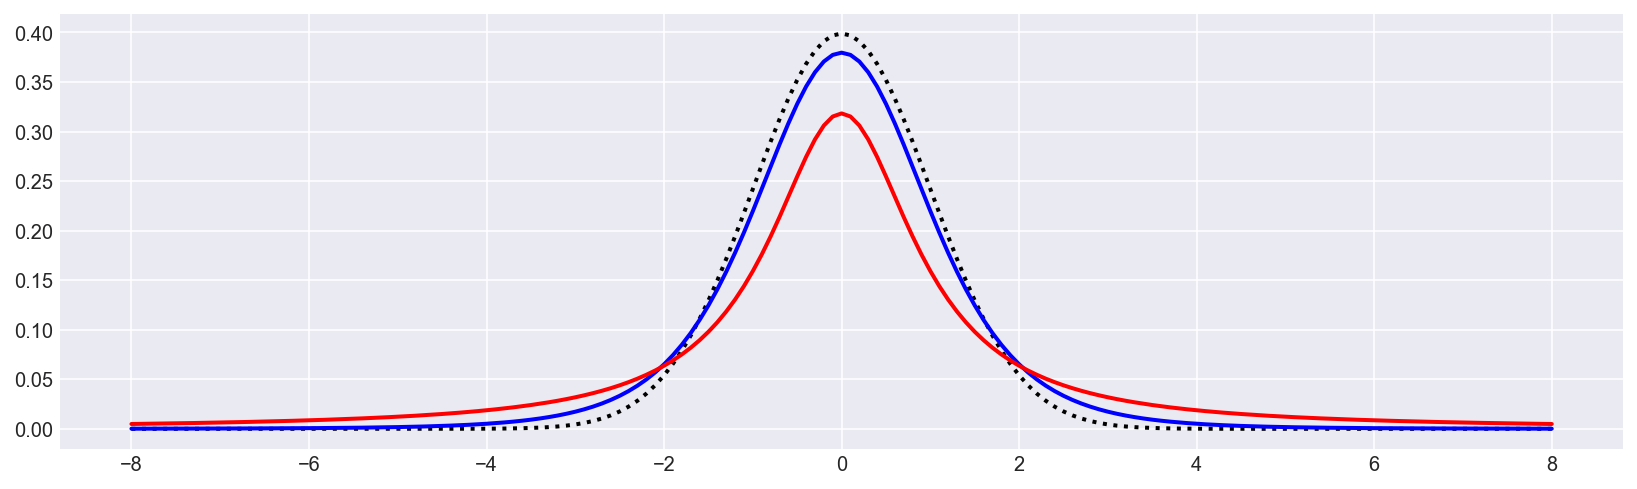

In [51]:
# 자유도 n이 커짐에 따라 표준정규분포 N(0,1)에 수렴
plt.plot(x,stats.norm.pdf(x=x),
        color='black',linestyle='dotted')
plt.plot(x,stats.t.pdf(x=x,df=5),
        color='blue')
plt.plot(x,stats.t.pdf(x=x, df=1),color='red')


In [52]:
df=pd.read_csv('../Data/5_7_fl.csv')
fish = df['length']
fish

0    4.352982
1    3.735304
2    5.944617
3    3.798326
4    4.087688
5    5.265985
6    3.272614
7    3.526691
8    4.150083
9    3.736104
Name: length, dtype: float64

In [53]:
# 모평균의 점추정
mu = np.mean(fish)
round(mu,2)

4.19

In [54]:
# 모분산의 점추정
sigma_2 = np.var(fish,ddof=1)
round(sigma_2,2)

0.68

In [55]:
# 표준 오차
sigma = np.std(fish,ddof=1)
se = sigma/np.sqrt(len(fish))
round(se,2)

0.26

In [56]:
df = len(fish)-1

In [57]:
# 신뢰구간
interval = stats.t.interval(alpha=0.95, df=df, loc=mu, scale=se)
interval

(3.597010056835825, 4.777068592173221)

In [59]:
#표준편차를 10배로 늘려서 신뢰구간 계산
se2 = (sigma*10)/np.sqrt(len(fish))
stats.t.interval(alpha = 0.95, df=df, loc=mu, scale=se2)

(-1.7132533521824618, 10.087332001191509)

In [66]:
#샘플사이즈를 10배로 늘려서 신뢰구간 계산
df2 = (len(fish)*10)-1
se3 =sigma/np.sqrt(len(fish)*10)
stats.t.interval(alpha = 0.99,df=df2,loc=mu,scale=se3)

(3.9704123408076932, 4.403666308201353)

In [67]:
#신뢰 계수가 커질수록 안전해진다고 볼 수 있으며 신뢰구간의 폭이 넓어짐
stats.t.interval(alpha=0.99, df=df, loc=mu, scale=se)

(3.3393979149413977, 5.034680734067649)